In [1]:
pwd

'C:\\Users\\woute\\Documents\\Reproduction_project\\HEAT_Reproduction'

In [23]:
import pickle
from plot import plot_graph_rplan, plot_polygons_rplan
import matplotlib.pyplot as plt
from utils import ROOM_ARRAY_Z
import numpy as np
import shapely
from shapely.geometry import MultiPolygon, Point

C:\Users\woute\AppData\Local\Temp\ipykernel_5892\1642000507.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/5.pickle', 'rb'))


([{0: <POLYGON ((124 79, 124 97, 123 97, 54 97, 54 105, 53 105, 43 105, 43 150, 54...>, 1: <POLYGON ((54 163, 54 203, 121 203, 121 163, 54 163))>, 2: <POLYGON ((156 137, 156 169, 214 169, 214 137, 156 137))>, 3: <POLYGON ((115 54, 115 76, 146 76, 146 54, 115 54))>, 4: <POLYGON ((54 54, 54 94, 121 94, 121 79, 112 79, 112 54, 54 54))>, 5: <POLYGON ((149 54, 149 94, 197 94, 197 54, 149 54))>}, {0: <POLYGON ((125 76, 125 79, 136 79, 136 76, 125 76))>, 1: <POLYGON ((146 81, 146 92, 149 92, 149 81, 146 81))>, 2: <POLYGON ((121 82, 121 93, 124 93, 124 82, 121 82))>, 3: <POLYGON ((171 134, 171 137, 194 137, 194 134, 171 134))>, 4: <POLYGON ((100 160, 100 163, 113 163, 113 160, 100 160))>}, {0: <POLYGON ((115 54, 115 76, 146 76, 146 54, 115 54))>, 1: <POLYGON ((54 54, 54 94, 121 94, 121 79, 112 79, 112 54, 54 54))>, 2: <POLYGON ((149 54, 149 94, 197 94, 197 54, 149 54))>, 3: <POLYGON ((124 79, 124 97, 123 97, 54 97, 54 105, 53 105, 43 105, 43 150, 54...>, 4: <POLYGON ((156 137, 156 169, 214 169

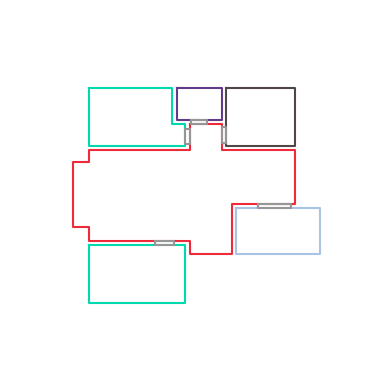

In [26]:
"""
This code prints a polygon as saved in the geometry files. I suspect that it only plot the edges of
the walls. It could maybe be possible to select the interior walls and print those. Or select the
interior and exterior walls and convert them to a annot.npy file.
"""
COLORS = [np.array(ROOM_ARRAY_Z[n][1])/255 for n in range(18)]

polygon = pickle.load(open('../RPLAN/geometry/5.pickle', 'rb'))
print(polygon)
# fig, axs = plt.subplots(figsize=(250/DPI, 250/DPI), dpi=DPI)
fig, axs = plt.subplots()
# This makes the image based on the polygon input
plot_polygons_rplan(polygon, axs, colors=COLORS)

In [21]:
"""
Open annot.py file
"""
PATH_ANNOT = r'..\heat\data\s3d_floorplan\annot\00035.npy'
annot = np.load(PATH_ANNOT,allow_pickle=True)
print('annot is type:',type(annot))
print('annot_item is type:',type(annot.item()))
corner_connections = dict(annot.item())
print('corner_connections is type:',type(corner_connections))
corners = corner_connections.keys()

for corner in corners:
    print('corner at:',corner,'is connected to:',corner_connections[corner])


annot is type: <class 'numpy.ndarray'>
annot_item is type: <class 'collections.defaultdict'>
corner_connections is type: <class 'dict'>
corner at: (135.0, 233.0) is connected to: [(135, 197), (52.0, 233.0)]
corner at: (52.0, 233.0) is connected to: [(52, 197), (135.0, 233.0)]
corner at: (52, 197) is connected to: [(52.0, 130.0), (135, 197), (52.0, 233.0)]
corner at: (135, 197) is connected to: [(52, 197), (193, 197), (135.0, 233.0)]
corner at: (233, 145) is connected to: [(233.0, 197.0), (193, 145), (233.0, 100.0)]
corner at: (233.0, 100.0) is connected to: [(233, 145), (193.0, 100.0)]
corner at: (193.0, 100.0) is connected to: [(193, 36), (193, 107), (233.0, 100.0)]
corner at: (193, 107) is connected to: [(127, 107), (193, 145), (193, 100)]
corner at: (193, 145) is connected to: [(193, 197), (193, 107), (233, 145)]
corner at: (21.0, 36.0) is connected to: [(52, 36), (21.0, 107.0)]
corner at: (21.0, 107.0) is connected to: [(30, 107), (21.0, 36.0)]
corner at: (30, 107) is connected to:

In [20]:
"""
The geometry files contain 
"""
print(type(polygon))
polinfo = polygon[1]
print(type(polinfo))
polygons = polygon[0]
print(type(polygons))
print(polygons[0])
print(type(polygons[0]))

<class 'tuple'>
<class 'list'>
<class 'list'>
{0: <POLYGON ((124 79, 124 97, 123 97, 54 97, 54 105, 53 105, 43 105, 43 150, 54...>, 1: <POLYGON ((54 163, 54 203, 121 203, 121 163, 54 163))>, 2: <POLYGON ((156 137, 156 169, 214 169, 214 137, 156 137))>, 3: <POLYGON ((115 54, 115 76, 146 76, 146 54, 115 54))>, 4: <POLYGON ((54 54, 54 94, 121 94, 121 79, 112 79, 112 54, 54 54))>, 5: <POLYGON ((149 54, 149 94, 197 94, 197 54, 149 54))>}
<class 'dict'>
